Importing Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

 Data Preprocessing

In [3]:
df = pd.read_csv('cancer patient data sets.csv')


In [5]:
print(df.columns)

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')


In [6]:
print(f"Unique categories in the target variable: {df['Level'].unique()}")

Unique categories in the target variable: ['Low' 'Medium' 'High']


In [7]:
print(f"Total number of columns {len(df.columns)}")

Total number of columns 26


In [9]:
print(f"first 50 records {df.head(50)} , last 50 records {df.tail(50)}")



first 50 records     index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0       0         P1   33       1              2            4             5   
1       1        P10   17       1              3            1             5   
2       2       P100   35       1              4            5             6   
3       3      P1000   37       1              7            7             7   
4       4       P101   46       1              6            8             7   
5       5       P102   35       1              4            5             6   
6       6       P103   52       2              2            4             5   
7       7       P104   28       2              3            1             4   
8       8       P105   35       2              4            5             6   
9       9       P106   46       1              2            3             4   
10     10       P107   44       1              6            7             7   
11     11       P108   64       2  

In [10]:
print(f"memory_size is {df.memory_usage().sum() / 1024**2} MB , dimensions are {df.shape}, the size of the dataset is {df.size}, and  the dimensions are {df.ndim}")

memory_size is 0.19849014282226562 MB , dimensions are (1000, 26), the size of the dataset is 26000, and  the dimensions are 2


In [11]:
print(f"toal sample size is {df.shape[0]}")

toal sample size is 1000


In [ ]:
print(f"the total number of records for each unique category in the target variable is {df['Level'].value_counts()}")

the total number of records for each unique category in the target variable is Level
High      365
Medium    332
Low       303
Name: count, dtype: int64


Text(0, 0.5, 'Number of Patients')

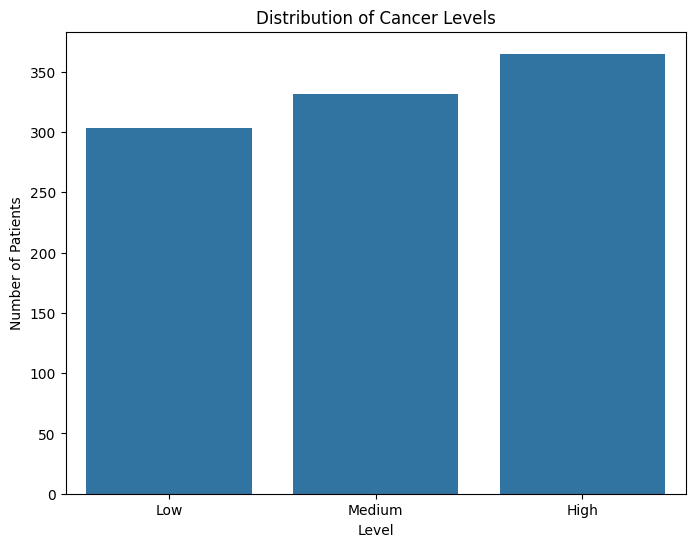

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Level', data=df)
plt.title('Distribution of Cancer Levels')
plt.xlabel('Level')
plt.ylabel('Number of Patients')

In [19]:
subset = df.loc[550:900 , 'Gender':'Coughing of Blood']


subset.to_csv('subset.csv')

In [23]:
print(f"statistical analysis {subset.describe()}")
print(f"Mode: {subset.mode().iloc[0]} ")


statistical analysis            Gender  Air Pollution  Alcohol use  Dust Allergy  \
count  351.000000     351.000000   351.000000    351.000000   
mean     1.396011       3.988604     4.749288      5.319088   
std      0.489765       2.042376     2.622941      1.921504   
min      1.000000       1.000000     1.000000      1.000000   
25%      1.000000       2.000000     2.000000      4.000000   
50%      1.000000       4.000000     5.000000      6.000000   
75%      2.000000       6.000000     7.000000      7.000000   
max      2.000000       8.000000     8.000000      8.000000   

       OccuPational Hazards  Genetic Risk  chronic Lung Disease  \
count            351.000000    351.000000            351.000000   
mean               4.974359      4.726496              4.472934   
std                2.084480      2.112374              1.823257   
min                1.000000      1.000000              1.000000   
25%                3.000000      3.000000              3.000000   
50%      

In [24]:
subset1 = df.iloc[-20:, 18:23]
subset1.to_csv('subset1.csv')

In [25]:
print(f"statistical analysis {subset1.describe()}")
print(f"Mode: {subset1.mode().iloc[0]} ")


statistical analysis        Shortness of Breath   Wheezing  Swallowing Difficulty  \
count            20.000000  20.000000               20.00000   
mean              5.400000   3.650000                3.95000   
std               2.542274   2.621269                2.37254   
min               2.000000   1.000000                1.00000   
25%               3.750000   1.000000                1.75000   
50%               5.000000   2.000000                4.00000   
75%               7.500000   7.000000                6.00000   
max               9.000000   7.000000                8.00000   

       Clubbing of Finger Nails  Frequent Cold  
count                  20.00000      20.000000  
mean                    4.05000       4.650000  
std                     1.79106       1.496487  
min                     2.00000       2.000000  
25%                     2.00000       4.000000  
50%                     4.00000       4.000000  
75%                     5.00000       6.000000  
max       

In [ ]:
sample = df.loc[[110, 220, 360, 440, 656, 778, 202, 889]]

print(average_alcohol_use := sample['Alcohol use'].mean())

5.625


Graphical Visualization

Text(0.5, 1.0, 'Correlation Matrix ')

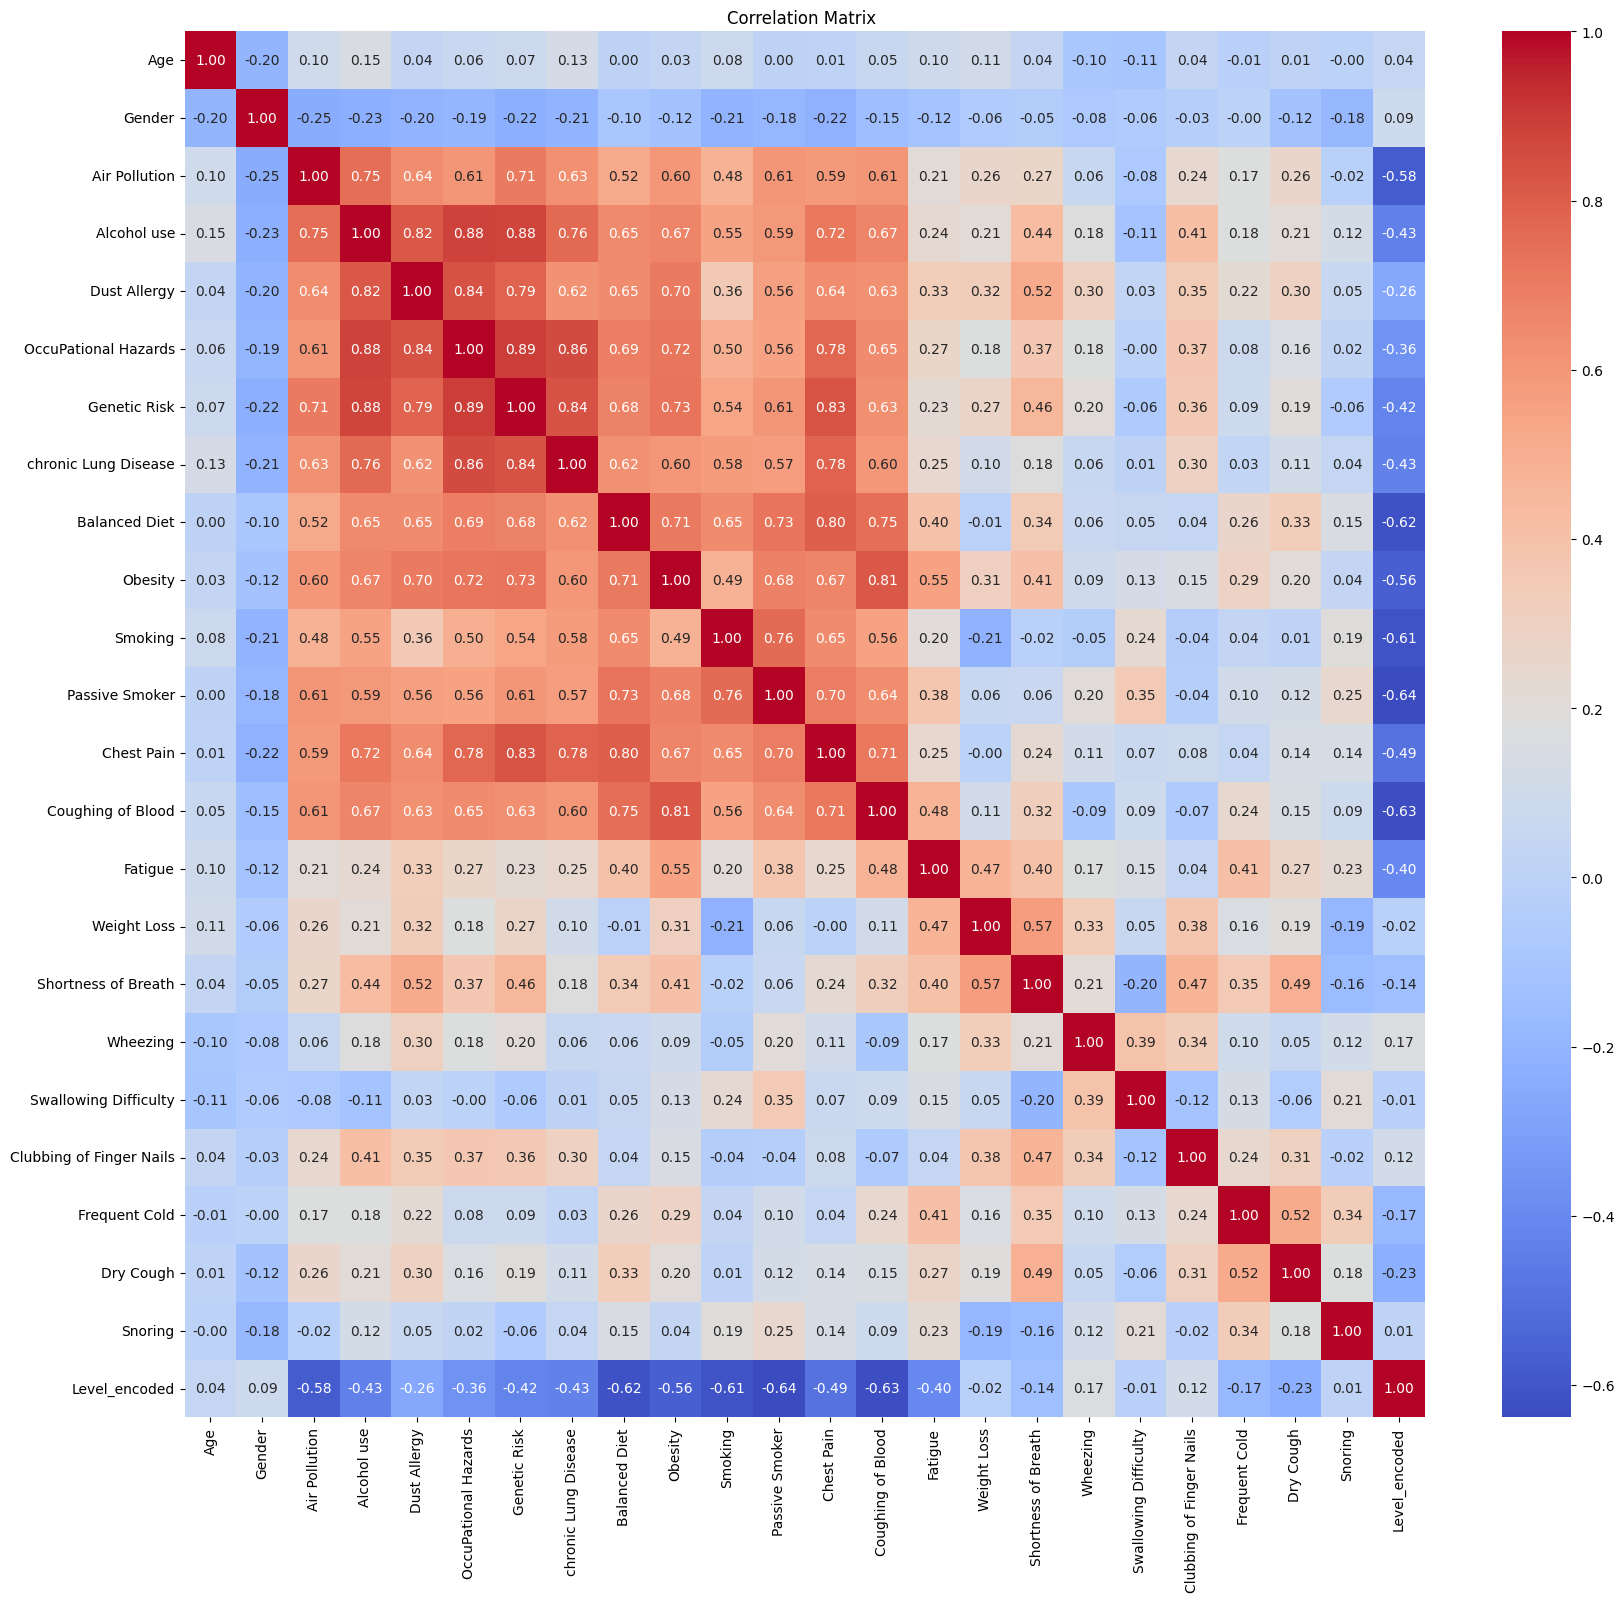

In [34]:
from sklearn.preprocessing import LabelEncoder

df = df.drop(['index', 'Patient Id'], axis=1)

encoder = LabelEncoder()

df['Level_encoded'] = encoder.fit_transform(df['Level'])

df_corr = df.drop('Level', axis=1)

# Calculate the correlation matrix
correlation_matrix = df_corr.corr()

# Plot the heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix ')


Distribution of Age and Frequent Cold


Text(0, 0.5, 'Frequency')

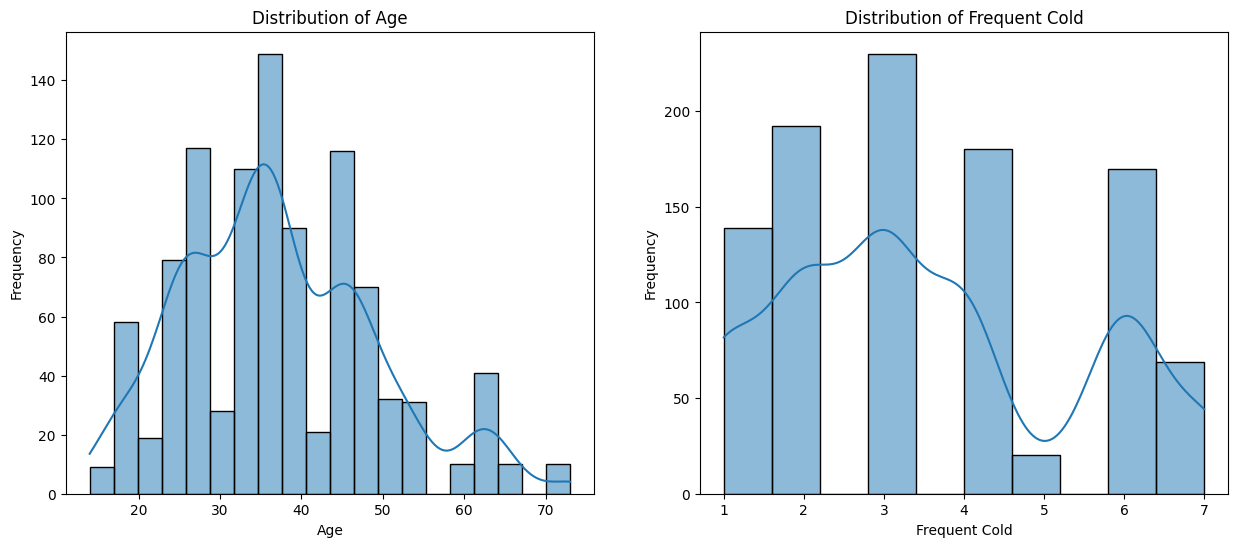

In [32]:
# C. Distribution of Age and Frequent Cold
print("Distribution of Age and Frequent Cold")
plt.figure(figsize=(15, 6))

# Age distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Frequent Cold distribution
plt.subplot(1, 2, 2)
sns.histplot(df['Frequent Cold'], kde=True, bins=10)
plt.title('Distribution of Frequent Cold')
plt.xlabel('Frequent Cold')
plt.ylabel('Frequency')


Outliers in Obesity Feature


Text(0.5, 0, 'Obesity')

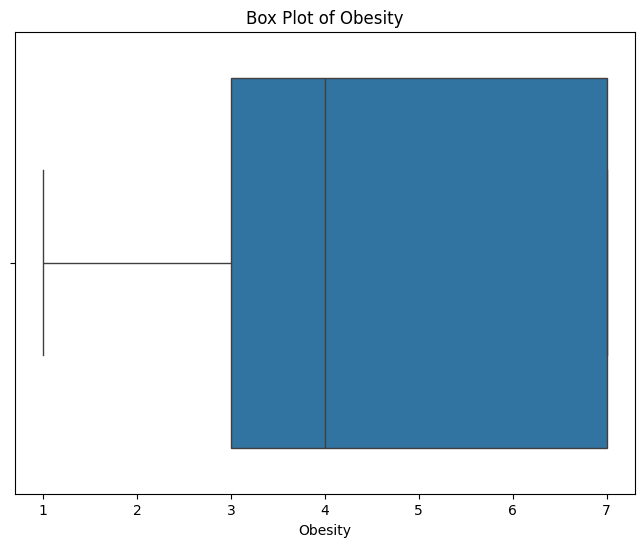

In [33]:

print("Outliers in Obesity Feature")
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Obesity'])
plt.title('Box Plot of Obesity')
plt.xlabel('Obesity')
